In [1]:
import json
import pandas as pd

In [2]:
number_of_days = 365 * 3

In [3]:
fhand = open('tapis-2017-2019.json') 
obj = json.load(fhand)
my_list = list()

for price in obj['prices']:
    my_list.append(price)
    
df = pd.DataFrame(my_list)
df['date'] = pd.to_datetime(df['time'], unit='s').dt.normalize()
df.set_index('date', inplace=True)
del df['time']
df = df.drop(df[(df.index < '2017-01-01') | (df.index >= '2020-01-01')].index)

dti = pd.date_range('2017-01-01', periods=number_of_days, freq='D')
df_full = pd.DataFrame([x for x in range(number_of_days)], dti, columns=['delme'])
df = df.merge(df_full, how='right', left_index=True, right_index=True, validate='one_to_one')
del df['delme']

df.price.fillna(method='bfill', inplace=True)
df.price = df.price.astype('float')
df['tapis_oil_price'] = df.price.apply(lambda x: x * 100).astype('int')
del df['price']

df

tapis_oil_price
2017-01-01             5863
2017-01-02             5863
2017-01-03             5863
2017-01-04             5761
2017-01-05             5779
...                     ...
2019-12-27             7445
2019-12-28             7456
2019-12-29             7456
2019-12-30             7456
2019-12-31             7411

[1095 rows x 1 columns]

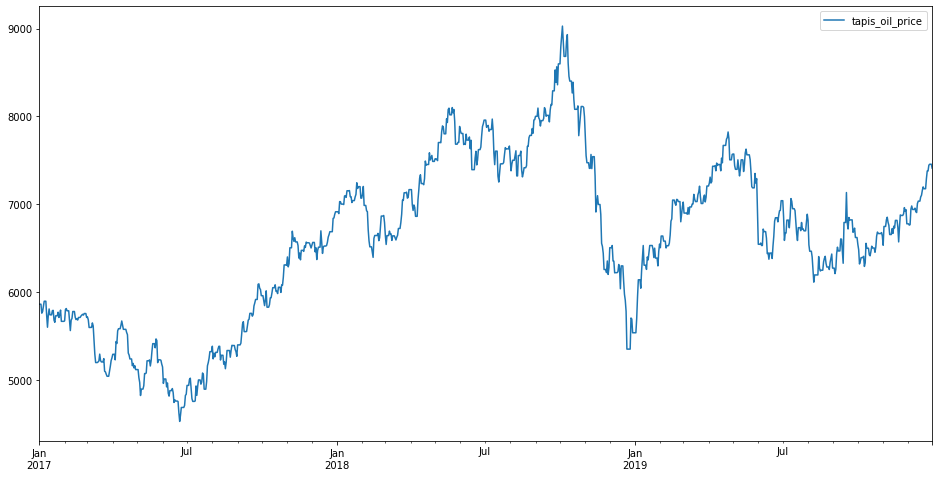

In [4]:
df.plot(figsize=(16,8))

In [5]:
df.to_csv('oil-prices/tapis-2017-2019.csv',index_label='date')